In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


In [5]:
df=pd.read_csv(r"C:\Users\prakh\Downloads\mnist_test.csv\mnist_test.csv")
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.shape

(10000, 785)

In [10]:
# Split into features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

# Normalize pixel values
X = X / 255.0

# Reshape for CNN: (samples, 28, 28, 1)
X = X.reshape(-1, 28, 28, 1)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)


In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


c:\Users\prakh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))


Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7390 - loss: 0.8624 - val_accuracy: 0.9570 - val_loss: 0.1513
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9642 - loss: 0.1123 - val_accuracy: 0.9700 - val_loss: 0.1022
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9782 - loss: 0.0674 - val_accuracy: 0.9700 - val_loss: 0.0902
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9848 - loss: 0.0509 - val_accuracy: 0.9730 - val_loss: 0.0763
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9902 - loss: 0.0329 - val_accuracy: 0.9720 - val_loss: 0.0931


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9721 - loss: 0.0961
Validation accuracy: 0.9720
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


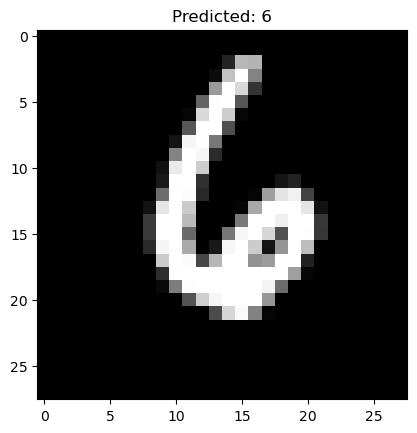

In [13]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_acc:.4f}")

# Predict a sample
import matplotlib.pyplot as plt

sample = X_val[0]
prediction = model.predict(np.expand_dims(sample, axis=0))
predicted_label = np.argmax(prediction)

plt.imshow(sample.reshape(28,28), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.show()
